In [12]:
# -------------------------------------------
# Step 4 — Install dependencies for SD1.5 baseline
# -------------------------------------------

# Install PyTorch (CUDA 12.1 is supported on Colab T4)
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

# Core libraries for Stable Diffusion
!pip install diffusers transformers accelerate safetensors

# Optional but recommended for faster attention
!pip install xformers

# Image processing
!pip install pillow opencv-python


Looking in indexes: https://download.pytorch.org/whl/cu121


In [13]:
import torch
from diffusers import StableDiffusionPipeline
import time

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
).to("cuda")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [25]:
t0 = time.time()
image = pipe("a cute cat sitting on the moon, digital art", num_inference_steps=25).images[0]
t1 = time.time()

print("Latency:", t1 - t0, "seconds")


  0%|          | 0/25 [00:00<?, ?it/s]

Latency: 4.421440362930298 seconds


In [26]:
image.save("baseline.png")


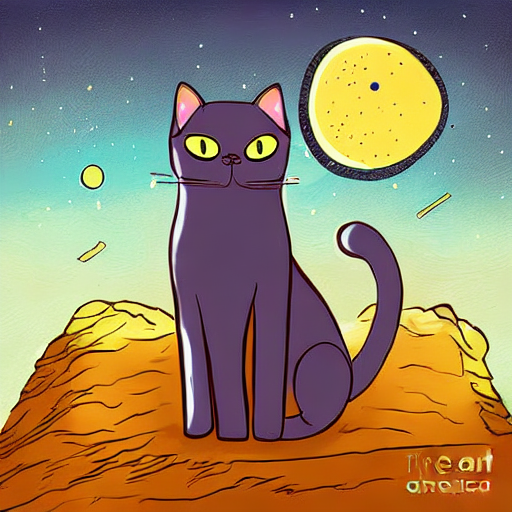

In [27]:
from IPython.display import Image
Image(filename="baseline.png")
